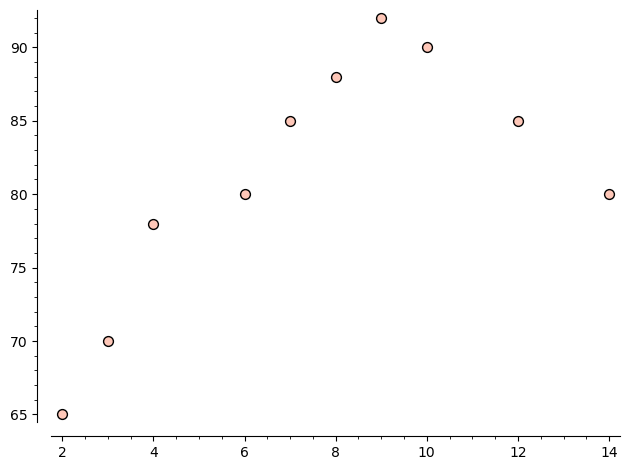

In [14]:
# 2.8.1 Regression Parameters
D = [(2, 65), (3, 70), (4, 78), (6, 80), (7, 85), (8, 88), (9, 92), (10, 90), (12, 85), (14, 80)] # len(D) = 10

# Constructing a scatter plot from the data points
s = scatter_plot(D)

s.show()

In [15]:
# Finding the regression line using the find_fit() function
var("m, x, b")

model(x) = m*x + b
find_fit(D, model)

[b == 70.22857142857146, m == 1.476190476190475]

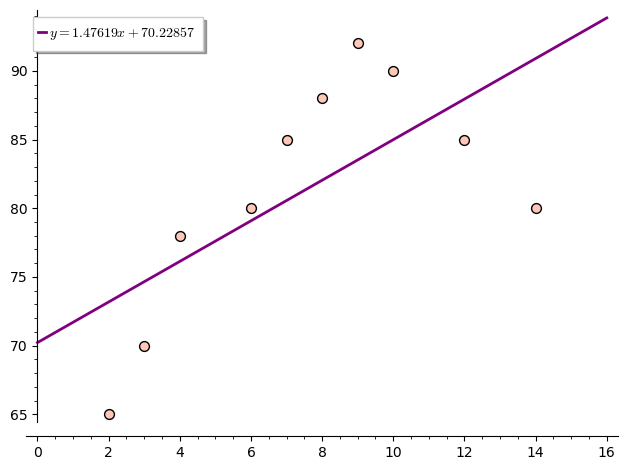

In [16]:
# Plotting the regression line along with the scatter plot
regression_line(x) = 1.476*x + 70.229

p = plot(regression_line, (x, 0, 16), color="purple", thickness=2, legend_label = r"$y = 1.47619x + 70.22857$")

show_all = s + p

show_all.show()

In [17]:
var("m, b, x_i, y_i")

sum_x_i = 0
sum_y_i = 0
sum_x_i_squared = 0
sum_xy = 0
n = 10 # Number of data points

for i in range(10):
    sum_x_i += D[i][0] # Computes sum(x_i)
    sum_y_i += D[i][1] # Computes sum(y_i)
    sum_x_i_squared += (D[i][0])^2 # Computes sum(x_i^2)
    sum_xy += D[i][0]*D[i][1] # Computes sum(x_i*y_i)


print(sum_x_i)
print(sum_y_i)
print(sum_x_i_squared)
print(sum_xy)

75
813
699
6299


In [18]:
# Solving the system of equations:
equation_1 = sum_x_i_squared*m + sum_x_i*b
equation_2 = sum_x_i*m + n*b

solve([equation_1 == sum_xy, equation_2 == sum_y_i], m, b)

[[m == (31/21), b == (2458/35)]]

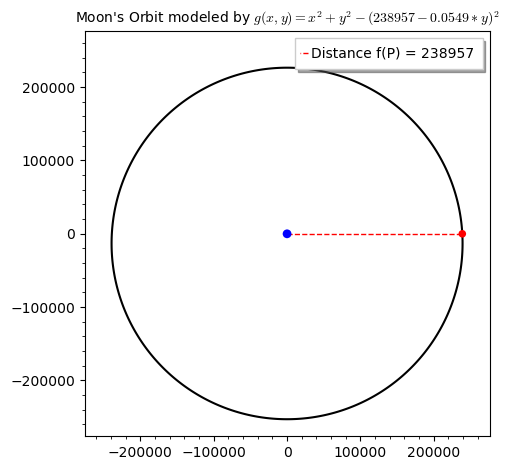

In [19]:
var('x, y')

g(x, y) = x^2 + y^2 - (238957 - 0.0549*y)^2

P_moon = (238957, 0)
r_max = 238957 / (1 - 0.0549)
plot_range = r_max.n() * 1.05

# Plotting the circle
circle_plot = implicit_plot(g == 0, (x, -plot_range, plot_range), (y, -plot_range, plot_range), color='black', plot_points=300)

# Plotting Earth
earth_plot = point((0, 0), color='blue', size=40, zorder=10) # zorder=10 plots it "on top"

# Plotting the Moon
moon_plot = point(P_moon, color='red', size=30, zorder=9)

# Line for f(x, y)
distance_line = line([(0, 0), P_moon], color='red', linestyle='--', legend_label=f"Distance f(P) = {f_value_at_P}")

show_all = circle_plot + earth_plot + moon_plot + distance_line

# 7. Set final options
show_all.show(aspect_ratio=1, title=r"Moon's Orbit modeled by $g(x, y) = x^2 + y^2 - (238957 - 0.0549*y)^2$")

In [20]:
f(x, y) = sqrt(x^2 + y^2) # Objective Function
g(x, y) = x^2 + y^2 - (238957 - 0.0549*y)^2 # Constraint

grad_f = vector([f.diff(x).full_simplify(), f.diff(y).full_simplify()])
print(f"The gradient of f is: {grad_f}")

grad_g = vector([g.diff(x).full_simplify(), g.diff(y).full_simplify()])
print(f"The gradient of g is: {grad_g}")



The gradient of f is: (x/sqrt(x^2 + y^2), y/sqrt(x^2 + y^2))
The gradient of g is: (2*x, 1.99397198*y + 26237.4786)


In [36]:
# Setting up the system of equations
var("x, y, L")

equation_1 = x/sqrt(x^2 + y^2)
equation_2 = y/sqrt(x^2 + y^2)
equation_3 = x^2 + y^2

solutions = solve([equation_1 == 2*L*x, equation_2 == L*(1.99397198*y + 26237.4786), equation_3 == (238957 - 0.0549*y)^2], x, y, L)
print(solutions[0])
print(solutions[1])
print(solutions[2])
print(solutions[3])

[x == 0, y == (-2389570000/9451), L == (2252107190255000/1076313555723528308957)]
[x == 0, y == (2389570000/10549), L == (2513752909745000/1201357708107872168957)]
[x == 238957/14364350000000*I*sqrt(68390092435004761099000999)*sqrt(1001), y == (6252207619217193/1436435000), L == (7182175000000/238957)]
[x == -238957/14364350000000*I*sqrt(68390092435004761099000999)*sqrt(1001), y == (6252207619217193/1436435000), L == (7182175000000/238957)]


In [40]:
# Calculating the value of f at the critical points
solution_1 = f(0, -2389570000/9451)
print(f"Solution 1 is: {solution_1}")
solution_2 = f(0, 2389570000/10549)
print(f"Solution 2 is: {solution_2}")

if solution_1 > solution_2:
    print(f"The maximum value of f(x, y) is: {solution_1}")
    print(f"The minimum value of f(x, y) is: {solution_2}")
elif solution_1 < solution_2:
    print(f"The maximum value of f(x, y) is: {solution_2}")
    print(f"The minimum value of f(x, y) is: {solution_1}")
else:
    print("Either both values are equal or there is a problem in your comparison")

Solution 1 is: 2389570000/9451
Solution 2 is: 2389570000/10549
The maximum value of f(x, y) is: 2389570000/9451
The minimum value of f(x, y) is: 2389570000/10549


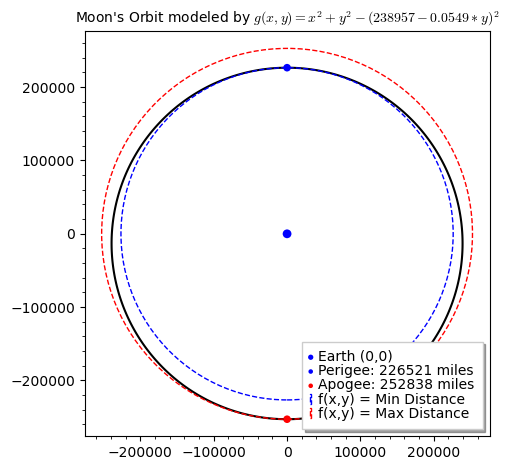

Perigee (min distance) found at y = 226521.00
Apogee (max distance) found at y = -252837.79


In [49]:
# Generating the visualization for the closest and most distant points
g = x^2 + y^2 - (238957 - 0.0549*y)^2

r_min = 2389570000 / 10549
r_max = 2389570000 / 9451

r_min_val = r_min.n()
r_max_val = r_max.n()

# (x=0, y=r_min)
perigee_point = (0, r_min_val)
# (x=0, y=-r_max)
apogee_point = (0, -r_max_val)

plot_range = r_max_val * 1.05

# The orbit itself (g=0)
orbit_plot = implicit_plot(g == 0, (x, -plot_range, plot_range), (y, -plot_range, plot_range), color='black', legend_label="Moon's Orbit (g=0)", plot_points=300)

# Earth
earth_plot = point((0, 0), color='blue', size=40, legend_label='Earth (0,0)', zorder=10)

# Perigee (closest point)
perigee_point_plot = point(perigee_point, color='blue', size=30, legend_label=f"Perigee: {r_min_val:.0f} miles", zorder=9)

# Apogee (farthest point)
apogee_point_plot = point(apogee_point, color='red', size=30, legend_label=f"Apogee: {r_max_val:.0f} miles", zorder=9)

# Perigee contour plot
perigee_contour = circle((0, 0), r_min_val, color='blue', linestyle='--', legend_label='f(x,y) = Min Distance')

# Apogee contour plot
apogee_contour = circle((0, 0), r_max_val, color='red', linestyle='--', legend_label='f(x,y) = Max Distance')


show_all = (orbit_plot + earth_plot + perigee_point_plot +
              apogee_point_plot + perigee_contour + apogee_contour)

show_all.set_legend_options(loc='lower right')
show_all.show(aspect_ratio=1, title=r"Moon's Orbit modeled by $g(x, y) = x^2 + y^2 - (238957 - 0.0549*y)^2$")

print(f"Perigee (min distance) found at y = {r_min_val:.2f}")
print(f"Apogee (max distance) found at y = -{r_max_val:.2f}")